In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno

from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA

from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import confusion_matrix

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
pip install missingno

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
dataset = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

In [5]:
dataset

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [7]:
categorical_col = []
for column in dataset.columns:
    if dataset[column].dtype == object and len(dataset[column].unique()) <= 50: #mengecek level/isi data kolom (bisa object, int, dan tipe data lainnya)
        categorical_col.append(column)
        print(f"{column} : {dataset[column].unique()}")
        print("====================================")


Gender : ['Male' 'Female']
Occupation : ['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']
BMI Category : ['Overweight' 'Normal' 'Obese' 'Normal Weight']
Blood Pressure : ['126/83' '125/80' '140/90' '120/80' '132/87' '130/86' '117/76' '118/76'
 '128/85' '131/86' '128/84' '115/75' '135/88' '129/84' '130/85' '115/78'
 '119/77' '121/79' '125/82' '135/90' '122/80' '142/92' '140/95' '139/91'
 '118/75']
Sleep Disorder : ['None' 'Sleep Apnea' 'Insomnia']


In [8]:
dataset['Sleep Disorder'].value_counts()

None           219
Sleep Apnea     78
Insomnia        77
Name: Sleep Disorder, dtype: int64

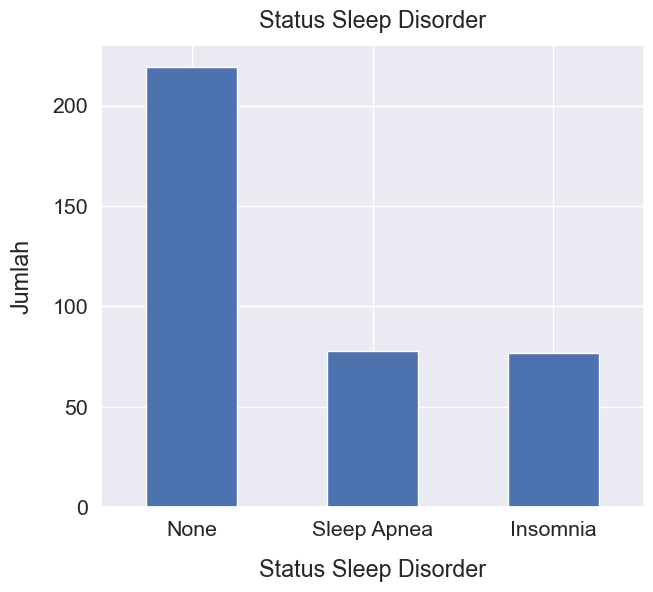

In [9]:
sns.set(font_scale=1.4)
dataset['Sleep Disorder'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Status Sleep Disorder", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Status Sleep Disorder", y=1.02);

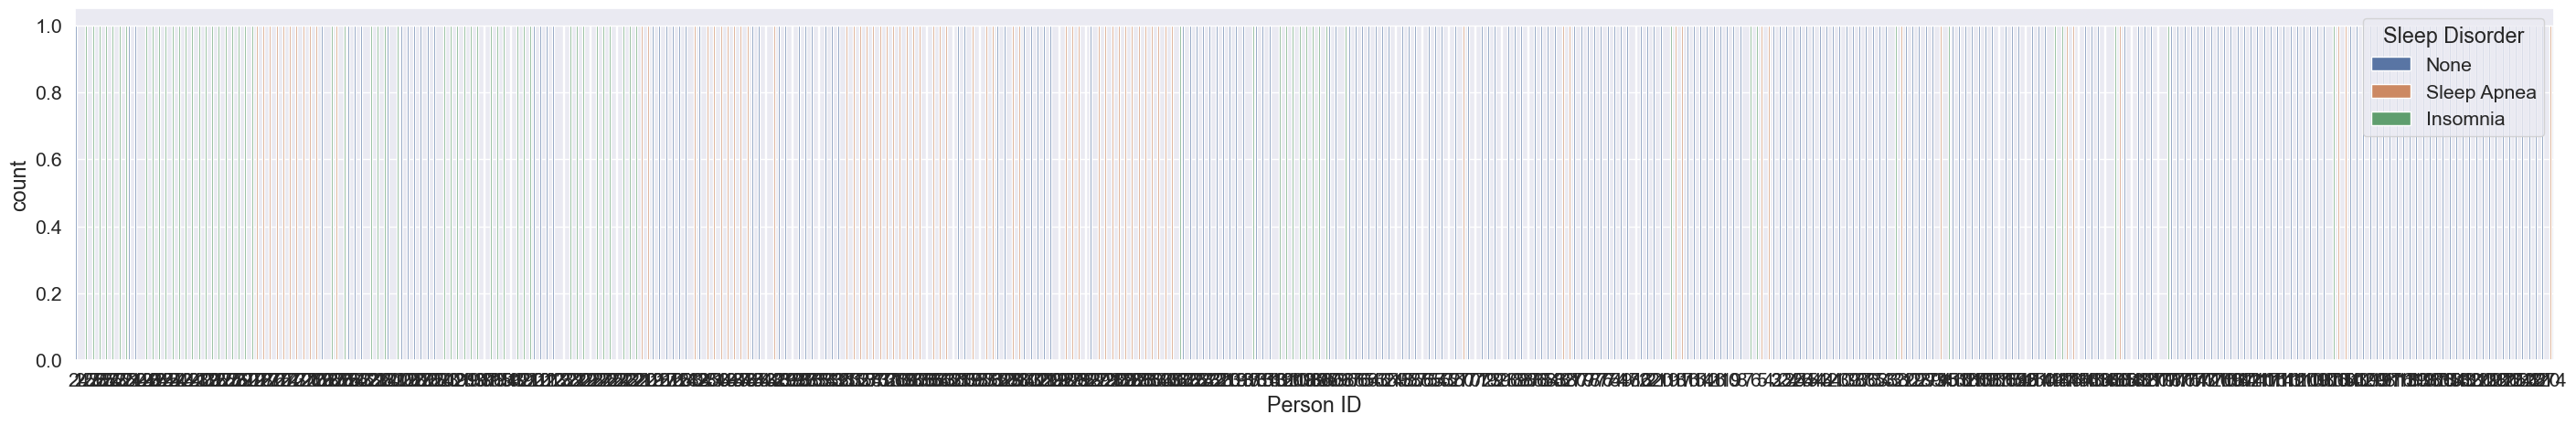

In [10]:
plt.subplots(figsize = (35,5))
sns.countplot(x=dataset['Person ID'],order=dataset['Person ID'].value_counts().index,hue=dataset['Sleep Disorder'])
plt.show()

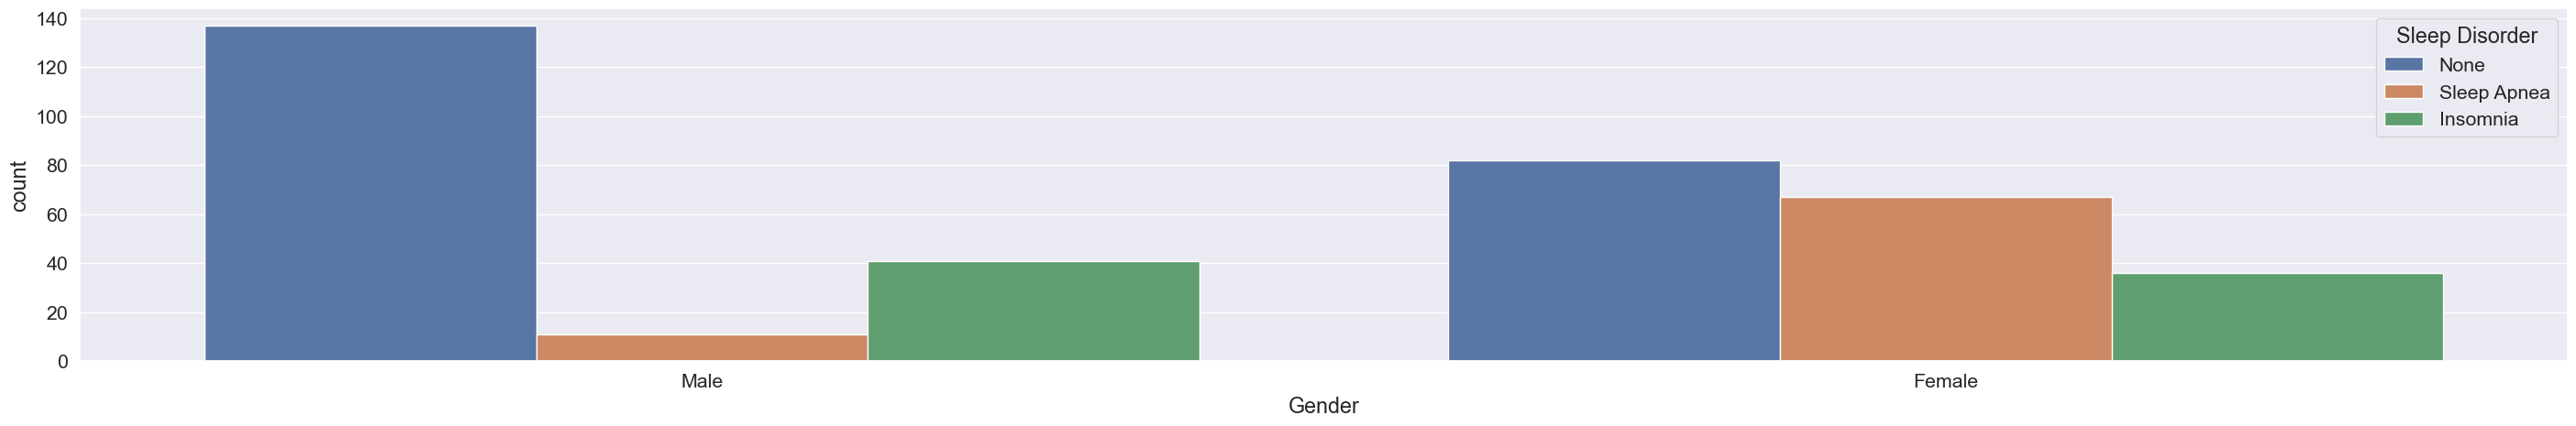

In [11]:
plt.subplots(figsize = (35,5))
sns.countplot(x=dataset['Gender'],order=dataset['Gender'].value_counts().index,hue=dataset['Sleep Disorder'])
plt.show()

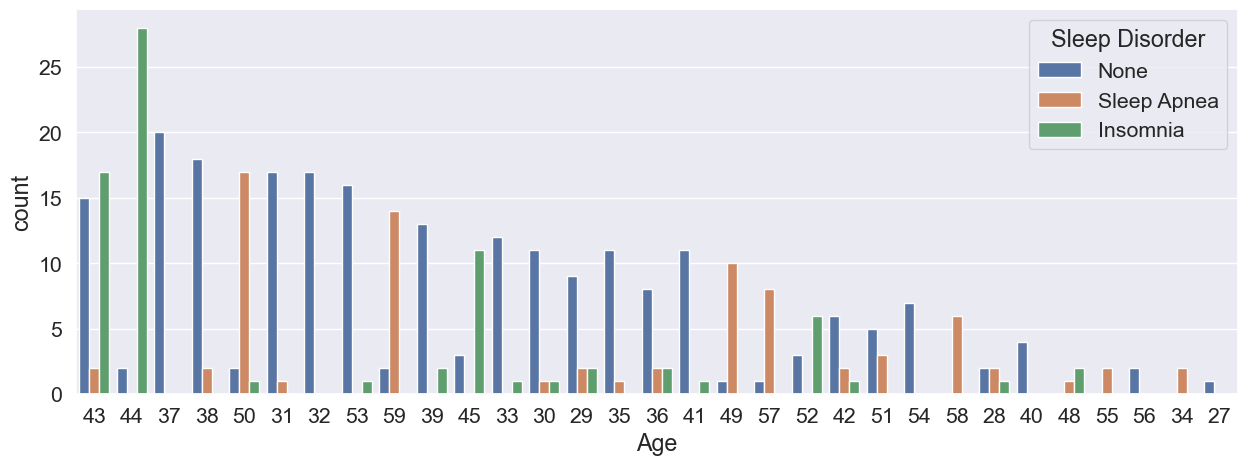

In [12]:
plt.subplots(figsize = (15,5))
sns.countplot(x=dataset['Age'],order=dataset['Age'].value_counts().index,hue=dataset['Sleep Disorder'])
plt.show()

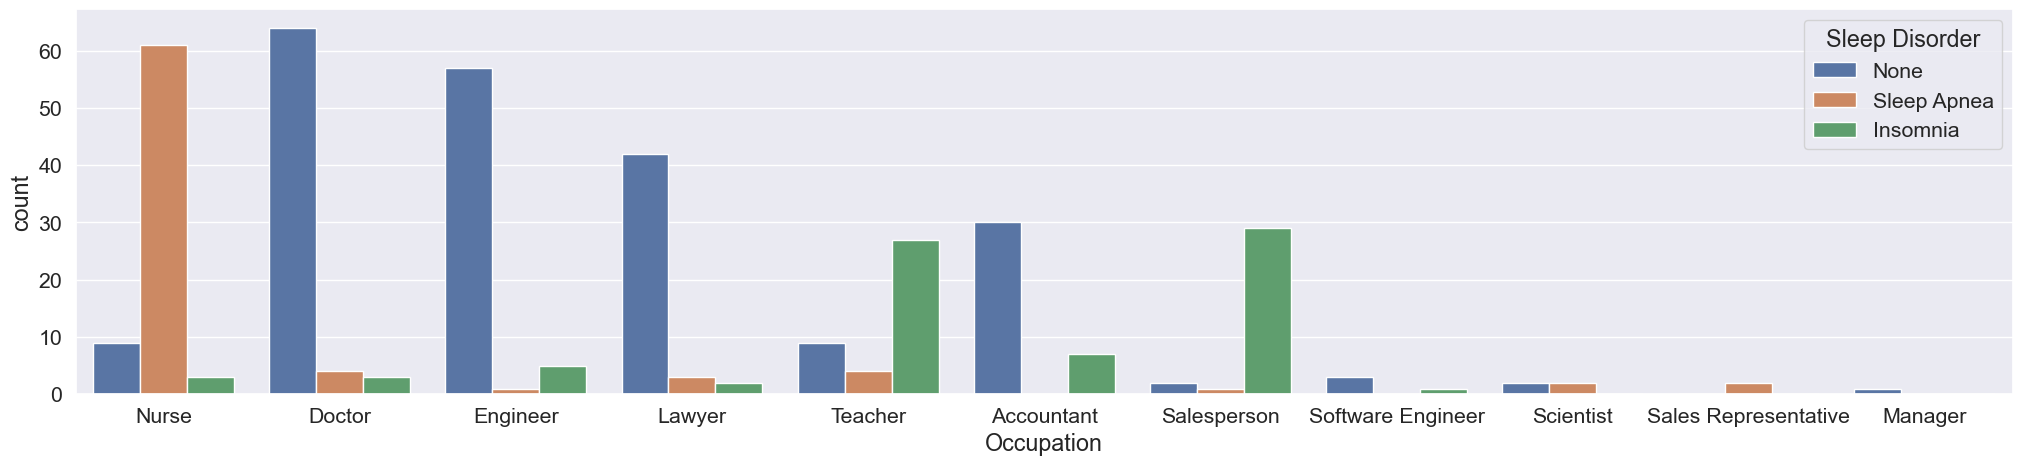

In [13]:
plt.subplots(figsize = (25,5))
sns.countplot(x=dataset['Occupation'],order=dataset['Occupation'].value_counts().index,hue=dataset['Sleep Disorder'])
plt.show()

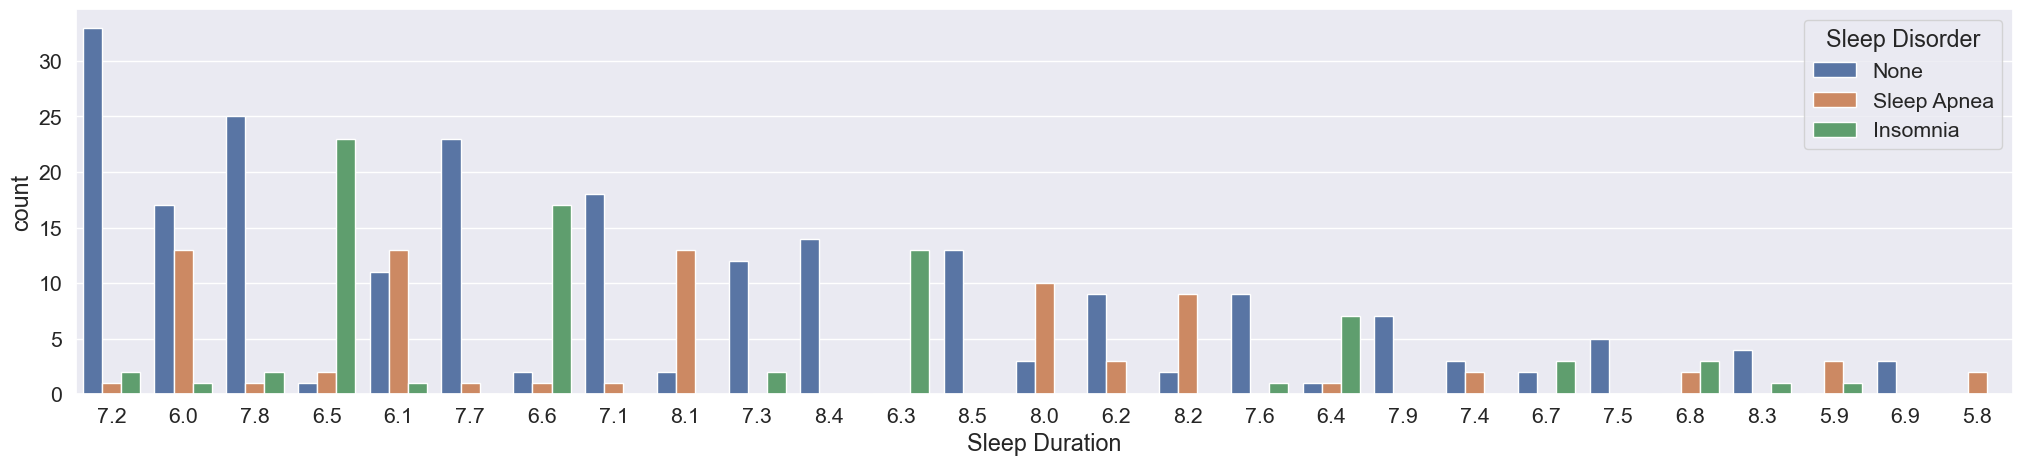

In [14]:
plt.subplots(figsize = (25,5))
sns.countplot(x=dataset['Sleep Duration'],order=dataset['Sleep Duration'].value_counts().index,hue=dataset['Sleep Disorder'])
plt.show()

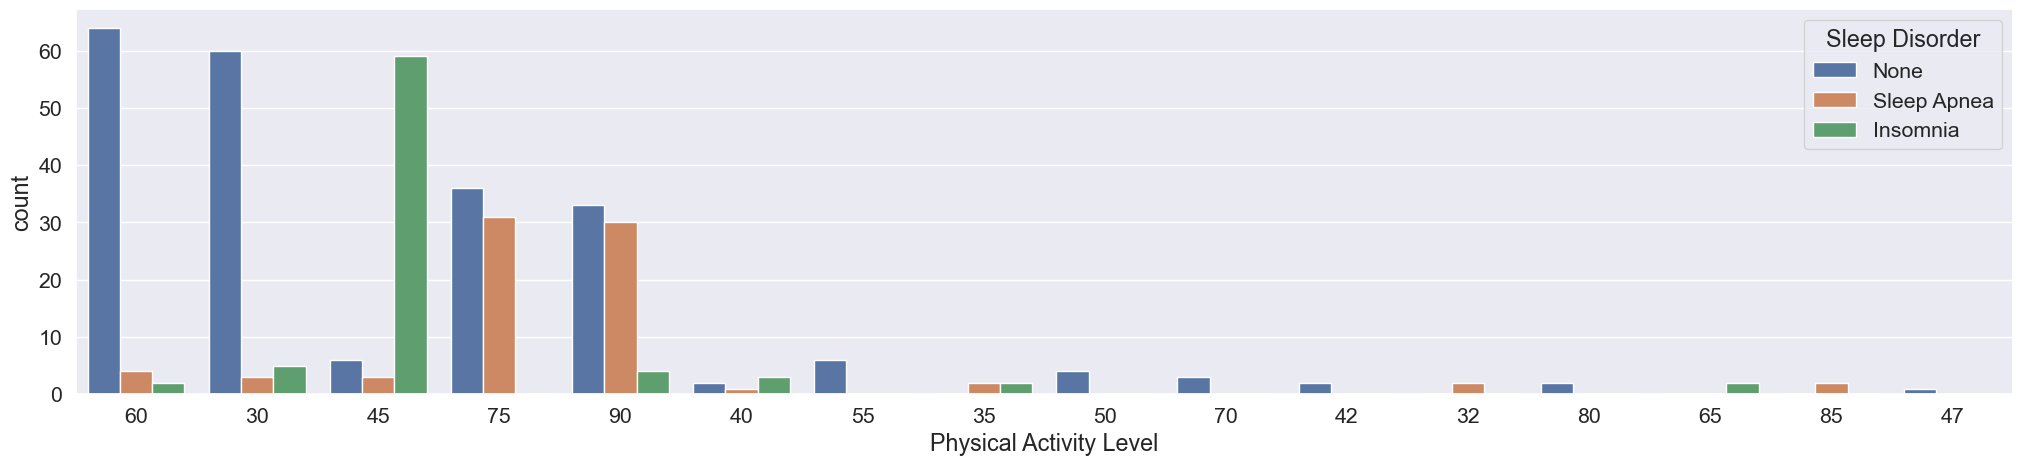

In [15]:
plt.subplots(figsize = (25,5))
sns.countplot(x=dataset['Physical Activity Level'],order=dataset['Physical Activity Level'].value_counts().index,hue=dataset['Sleep Disorder'])
plt.show()

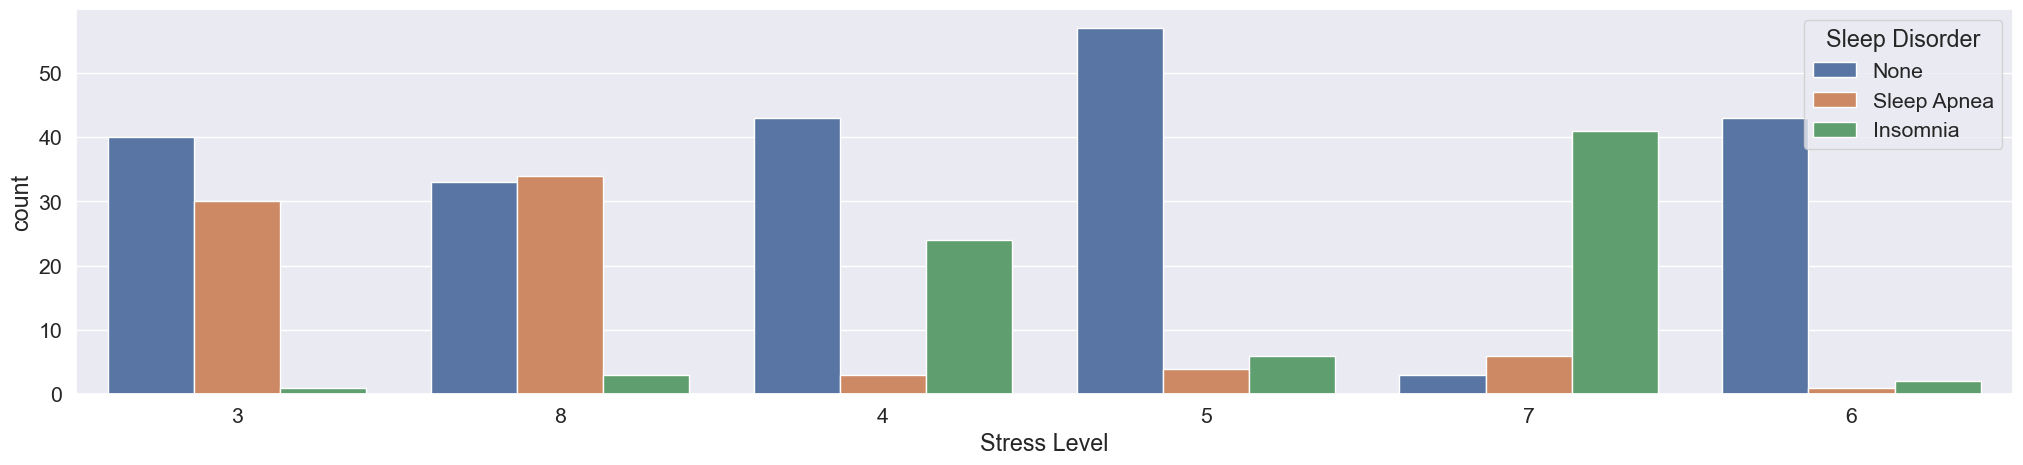

In [16]:
plt.subplots(figsize = (25,5))
sns.countplot(x=dataset['Stress Level'],order=dataset['Stress Level'].value_counts().index,hue=dataset['Sleep Disorder'])
plt.show()

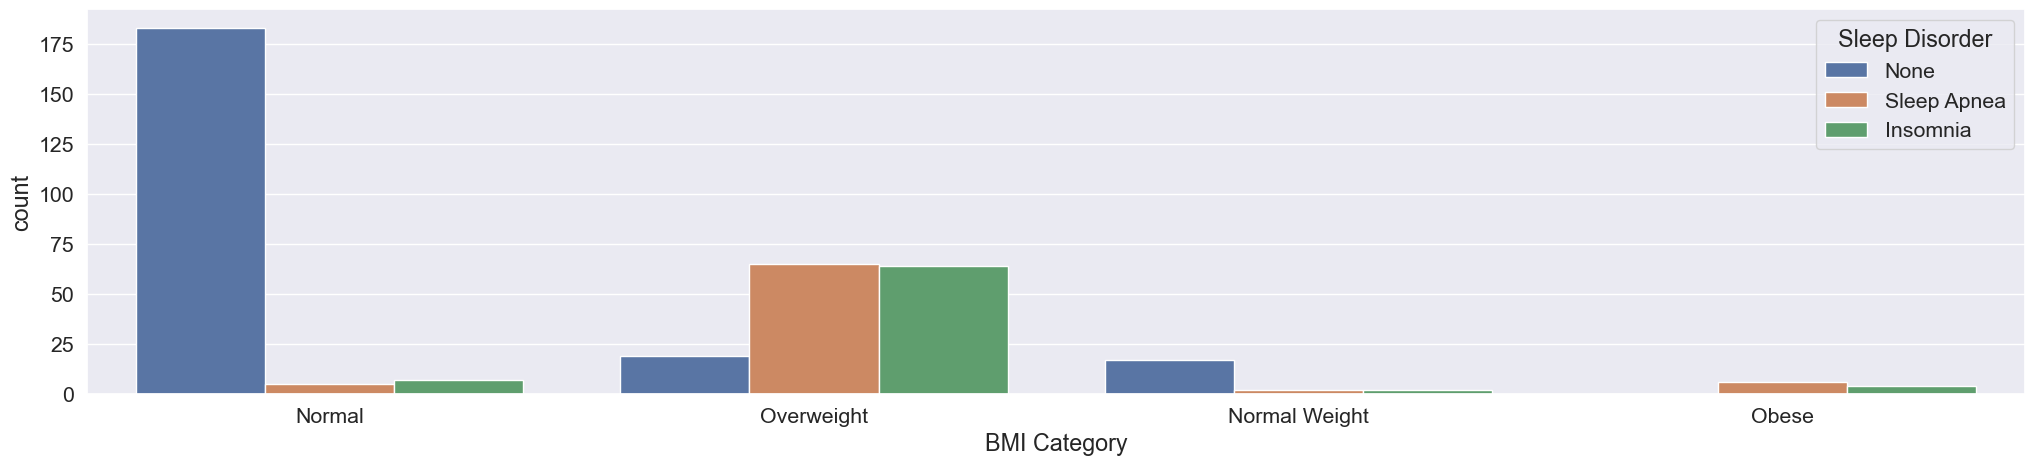

In [17]:
plt.subplots(figsize = (25,5))
sns.countplot(x=dataset['BMI Category'],order=dataset['BMI Category'].value_counts().index,hue=dataset['Sleep Disorder'])
plt.show()

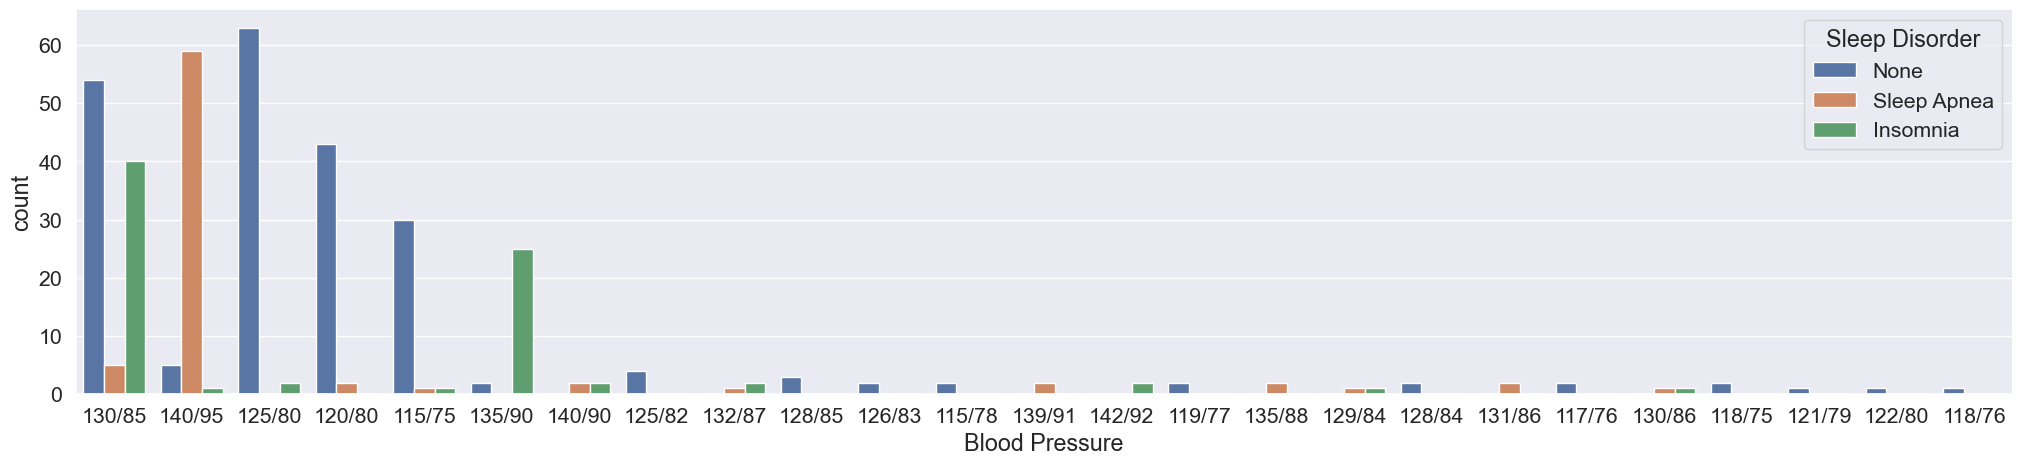

In [18]:
plt.subplots(figsize = (25,5))
sns.countplot(x=dataset['Blood Pressure'],order=dataset['Blood Pressure'].value_counts().index,hue=dataset['Sleep Disorder'])
plt.show()

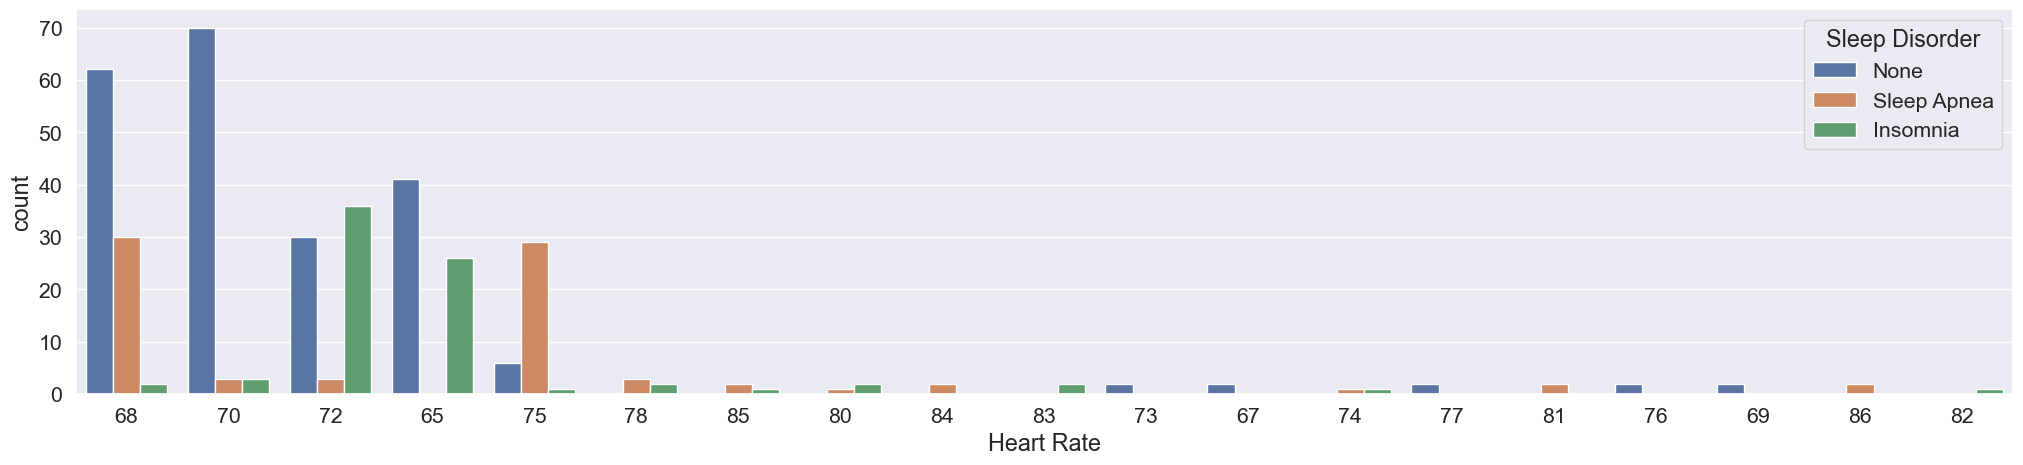

In [19]:
plt.subplots(figsize = (25,5))
sns.countplot(x=dataset['Heart Rate'],order=dataset['Heart Rate'].value_counts().index,hue=dataset['Sleep Disorder'])
plt.show()

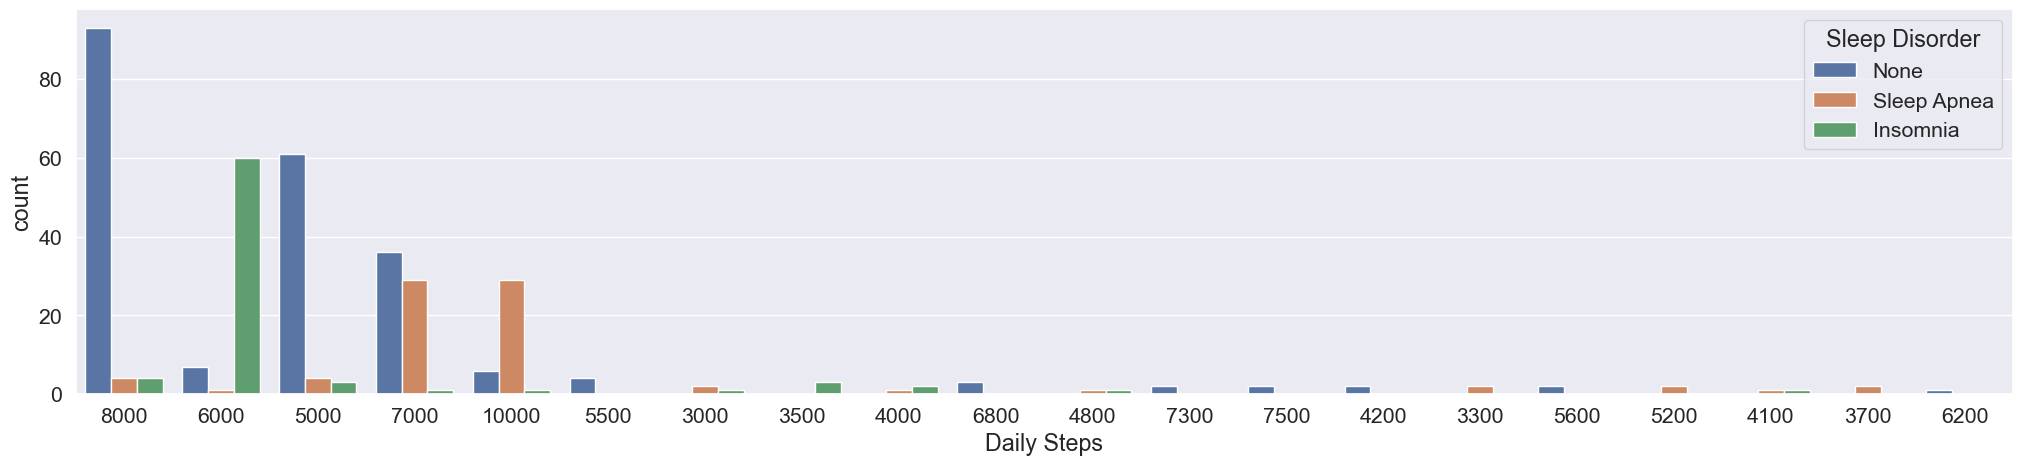

In [20]:
plt.subplots(figsize = (25,5))
sns.countplot(x=dataset['Daily Steps'],order=dataset['Daily Steps'].value_counts().index,hue=dataset['Sleep Disorder'])
plt.show()

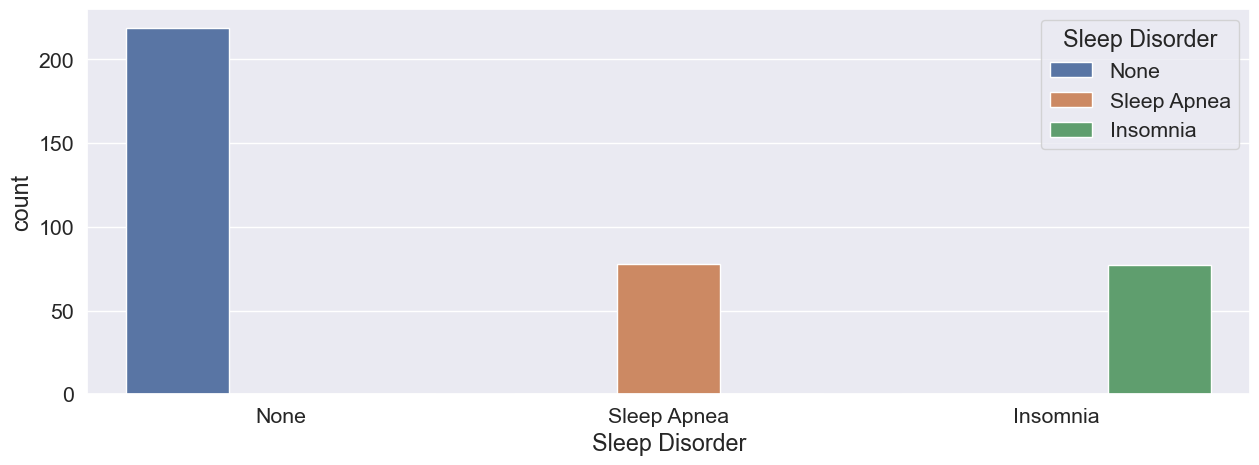

In [21]:
plt.subplots(figsize = (15,5))
sns.countplot(x=dataset['Sleep Disorder'],order=dataset['Sleep Disorder'].value_counts().index,hue=dataset['Sleep Disorder'])
plt.show()

C:\Users\Natsi\AppData\Local\Temp\ipykernel_12624\2197892842.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = dataset.corr()


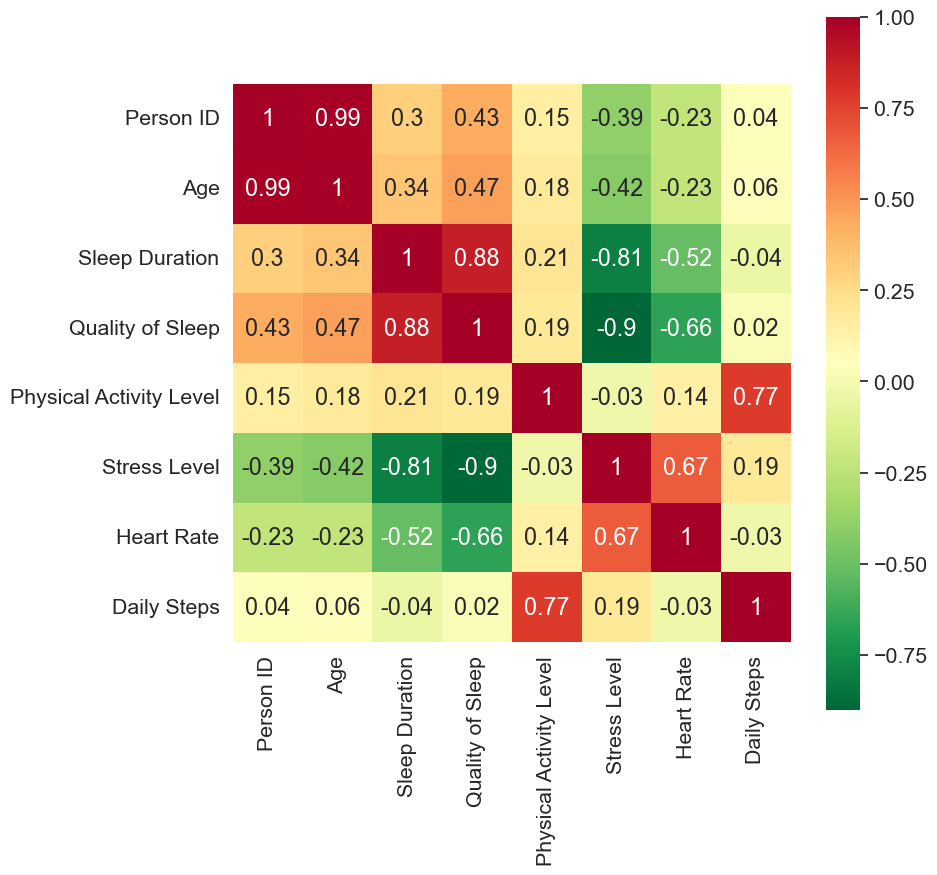

In [22]:
# Correlation Heatmap
correlation = dataset.corr()
plt.subplots(figsize = (9,9))
sns.heatmap(correlation.round(2),
            annot = True,
            vmax = 1,
            square = True,
            cmap = 'RdYlGn_r')
plt.show()

In [23]:
# Semua variabel tidak keluar
# Harus Mengubah data int/obj ke num
# masih ada missing value

### BAB 3 Memvalidasi Data

Masih ada data missing value
kelas hampir seimbang
semua variable tidak keluar karena data masih dalam bentuk objek belum kategory
sehingga selanjutnya perlu mengubah object menjadi numeric serta mengatasi data yang hilang

### BAB 4 Menentukan Objek Data

|           Nama          | Distribusi |
|:-----------------------:|:----------:|
|        Person ID        |  Atribute  |
|          Gander         |  Atribute  |
|           Age           |  Atribute  |
|        Occupation       |  Atribute  |
|      Sleep Duration     |  Atribute  |
|     Quality Of Sleep    |  Atribute  |
| Physical Activity Level |  Atribute  |
|       Stress Level      |  Atribute  |
|       BMI Category      |  Atribute  |
|      Blood Pressure     |  Atribute  |
|        Heart Rate       |  Atribute  |
|       Daily Steps       |  Atribute  |
|      Sleep Disorder     |    Class   |

### BAB 5 Membersihkan Data

In [24]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [25]:
categorical_col = []
for column in dataset.columns:
    if dataset[column].dtype == object and len(dataset[column].unique()) <= 50: #mengecek level/isi data kolom (bisa object, int, dan tipe data lainnya)
        categorical_col.append(column)
        print(f"{column} : {dataset[column].unique()}")
        print("====================================")


Gender : ['Male' 'Female']
Occupation : ['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']
BMI Category : ['Overweight' 'Normal' 'Obese' 'Normal Weight']
Blood Pressure : ['126/83' '125/80' '140/90' '120/80' '132/87' '130/86' '117/76' '118/76'
 '128/85' '131/86' '128/84' '115/75' '135/88' '129/84' '130/85' '115/78'
 '119/77' '121/79' '125/82' '135/90' '122/80' '142/92' '140/95' '139/91'
 '118/75']
Sleep Disorder : ['None' 'Sleep Apnea' 'Insomnia']


#### Tidak terdapat data ?

In [26]:
dataset.isnull().values.any() #Jika True artinya ada data yg hilang

False

In [27]:
dataset.loc[:, dataset.isnull().any()].columns #Feature yg terdiri data hilang

Index([], dtype='object')

**Mengubah kategorik menjadi numerik jika 2 kategori ganti dengan 0,1 ; jika >2 kategori ganti dengan 1,2,3,dst**

In [28]:
Gender = {'Male':1, 'Female':0}
dataset['Gender'] = dataset['Gender'].map(Gender)

Occupation = {'Sofware Engineer':1, 'Doctor':2, 'Sales Representative':3, 'Teacher':4, 'Nurse':5, 'Engineer':6, 'Accountant':7, 'Scientist':8, 'Lawyer':9, 'Salesperson':10, 'Manager':11}
dataset['Occupation'] = dataset['Occupation'].map(Occupation)

BMI_Category = {'Overweight':1, 'Normal':2, 'Obese':3, 'NormalWeight':4}
dataset['BMI Category'] = dataset['BMI Category'].map(BMI_Category)

Blood_Pressure = {'126/83':1, '125/80':2, '140/90':3, '120/80':4, '132/87':5, '130/86':6, '117/76':7, '118/76':8, '128/85':9, '131/86':10, '128/84':11, '115/75':12, '135/88':13, '129/84':14, '130/85':15, '115/78':16, '119/77':17, '121/79':18, '125/82':19, '135/90':20, '122/80':21, '142/92':22, '140/95':23, '139/91':24, '118/75':25}
dataset['Blood Pressure'] = dataset['Blood Pressure'].map(Blood_Pressure)

Sleep_Disorder = {'None':0, 'Sleep Apnea':1, 'Insomnia':2}
dataset['Sleep Disorder'] = dataset['Sleep Disorder'].map(Sleep_Disorder)



In [29]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    int64  
 2   Age                      374 non-null    int64  
 3   Occupation               370 non-null    float64
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             353 non-null    float64
 9   Blood Pressure           374 non-null    int64  
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 38.1 KB


In [30]:
dataset.isnull().values.any() #Jika True artinya ada data yg hilang

True

In [31]:
dataset.loc[:, dataset.isnull().any()].columns #Feature yg terdiri data hilang

Index(['Occupation', 'BMI Category'], dtype='object')

<Axes: >

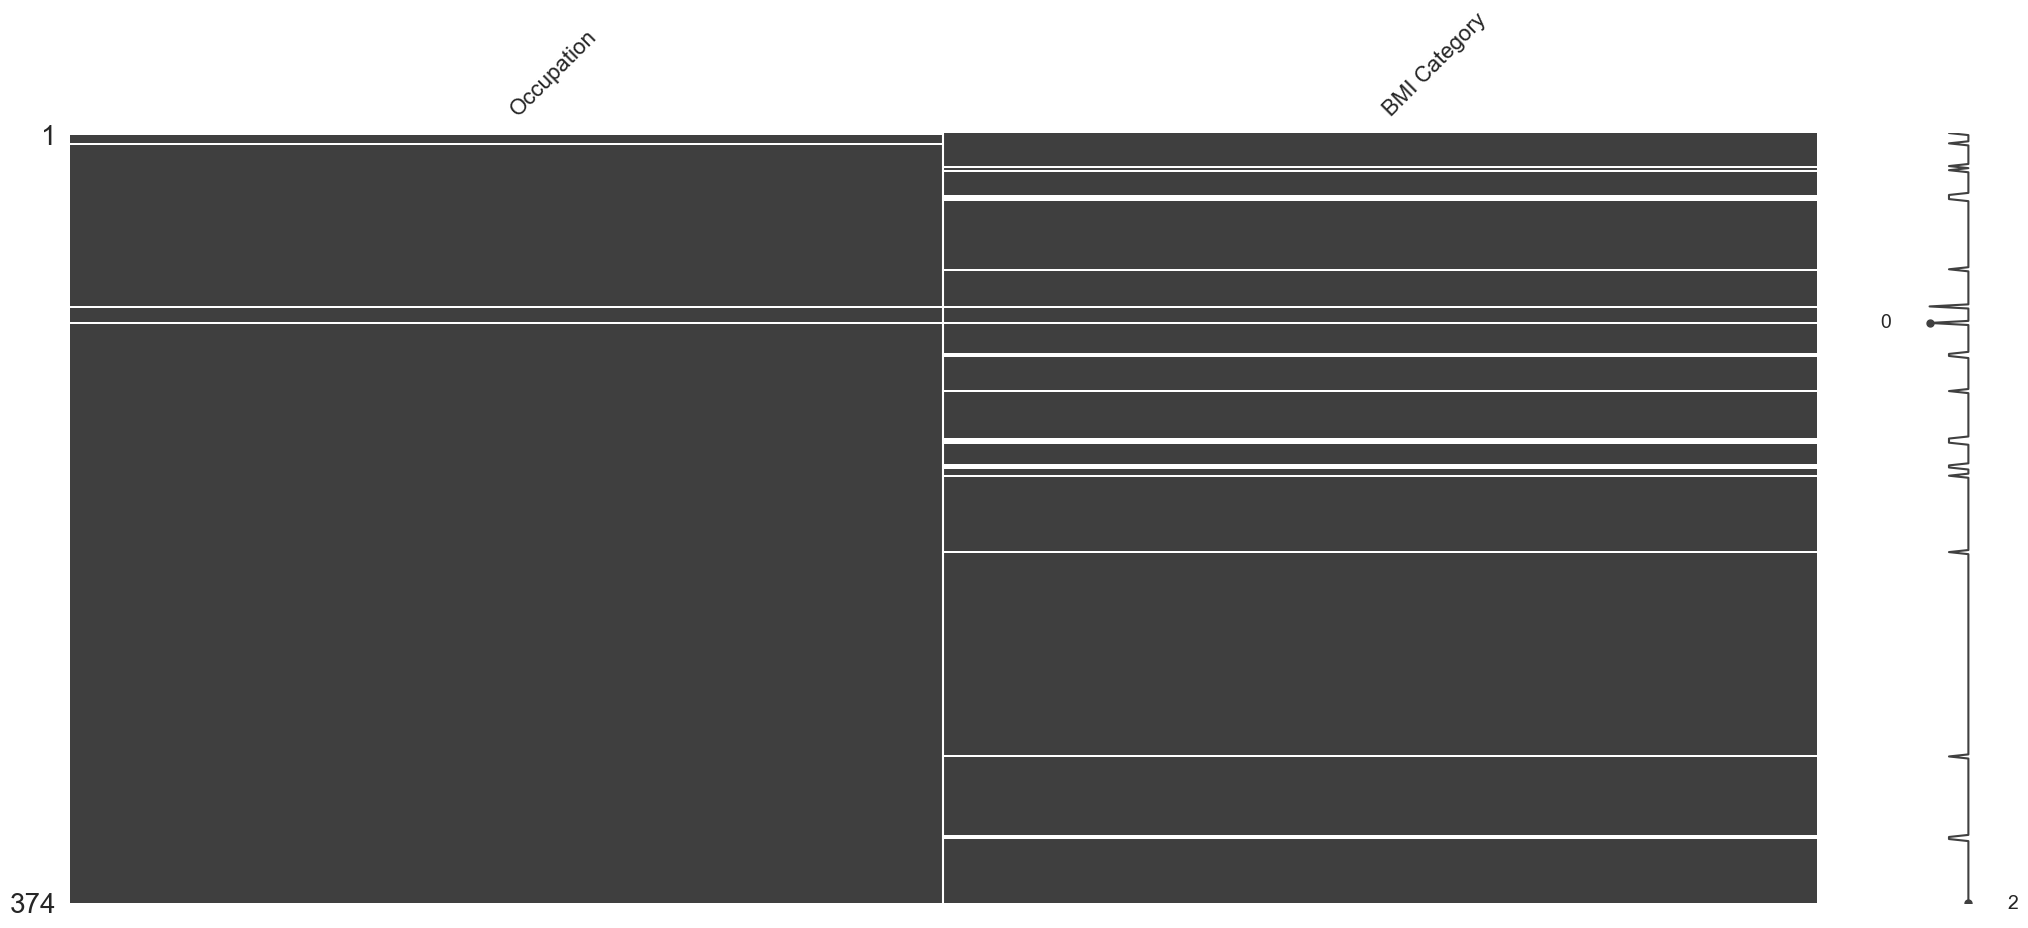

In [32]:
missingdata_df = dataset.columns[dataset.isnull().any()].tolist()
missingno.matrix(dataset[missingdata_df])

#### Mengisi data hilang dengan nilai median

In [33]:
# Data hilang = Occupation, BMI Category

In [34]:
median_value=dataset['Occupation'].median()
dataset['Occupation']=dataset['Occupation'].fillna(median_value)

median_value=dataset['BMI Category'].median()
dataset['BMI Category']=dataset['BMI Category'].fillna(median_value)

In [35]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    int64  
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    float64
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    float64
 9   Blood Pressure           374 non-null    int64  
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 38.1 KB


#### Temuan : Karena masih ada data object maka akan diubah menjadi float & int dengan melakukan BAB 6

#### Sudah tidak terdapat missing value dan clear

### BAB 6 Mengkontruksi Data

In [36]:
#merubah tipe data float menjadi int

dataset['Occupation'] = dataset['Occupation'].astype(float).astype(int)

dataset['Sleep Duration'] = dataset['Sleep Duration'].astype(float).astype(int)

dataset['BMI Category'] = dataset['BMI Category'].astype(float).astype(int)

In [37]:
#cek dataset
dataset

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,1,27,5,6,6,42,6,1,1,77,4200,0
1,2,1,28,2,6,6,60,8,2,2,75,10000,0
2,3,1,28,2,6,6,60,8,2,2,75,10000,0
3,4,1,28,3,5,4,30,8,3,3,85,3000,1
4,5,1,28,3,5,4,30,8,3,3,85,3000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,0,59,5,8,9,75,3,1,23,68,7000,1
370,371,0,59,5,8,9,75,3,1,23,68,7000,1
371,372,0,59,5,8,9,75,3,1,23,68,7000,1
372,373,0,59,5,8,9,75,3,1,23,68,7000,1


In [38]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Person ID                374 non-null    int64
 1   Gender                   374 non-null    int64
 2   Age                      374 non-null    int64
 3   Occupation               374 non-null    int32
 4   Sleep Duration           374 non-null    int32
 5   Quality of Sleep         374 non-null    int64
 6   Physical Activity Level  374 non-null    int64
 7   Stress Level             374 non-null    int64
 8   BMI Category             374 non-null    int32
 9   Blood Pressure           374 non-null    int64
 10  Heart Rate               374 non-null    int64
 11  Daily Steps              374 non-null    int64
 12  Sleep Disorder           374 non-null    int64
dtypes: int32(3), int64(10)
memory usage: 33.7 KB


## Menghapus Nilai Konstan

In [39]:
dataset = dataset.loc[:,dataset.apply(pd.Series.nunique) != 1]

In [40]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Person ID                374 non-null    int64
 1   Gender                   374 non-null    int64
 2   Age                      374 non-null    int64
 3   Occupation               374 non-null    int32
 4   Sleep Duration           374 non-null    int32
 5   Quality of Sleep         374 non-null    int64
 6   Physical Activity Level  374 non-null    int64
 7   Stress Level             374 non-null    int64
 8   BMI Category             374 non-null    int32
 9   Blood Pressure           374 non-null    int64
 10  Heart Rate               374 non-null    int64
 11  Daily Steps              374 non-null    int64
 12  Sleep Disorder           374 non-null    int64
dtypes: int32(3), int64(10)
memory usage: 33.7 KB


Temuan : Karena jumlah atribut masih sama-sama ada 13 artinya tidak ada data bernilai konstan

Cek data anda apakah ada data yg bernilai konstan, jika iya maka atribut anda akan berkurang dari jumlah atribut sebelumnya

# Cek korelasi tahap 2

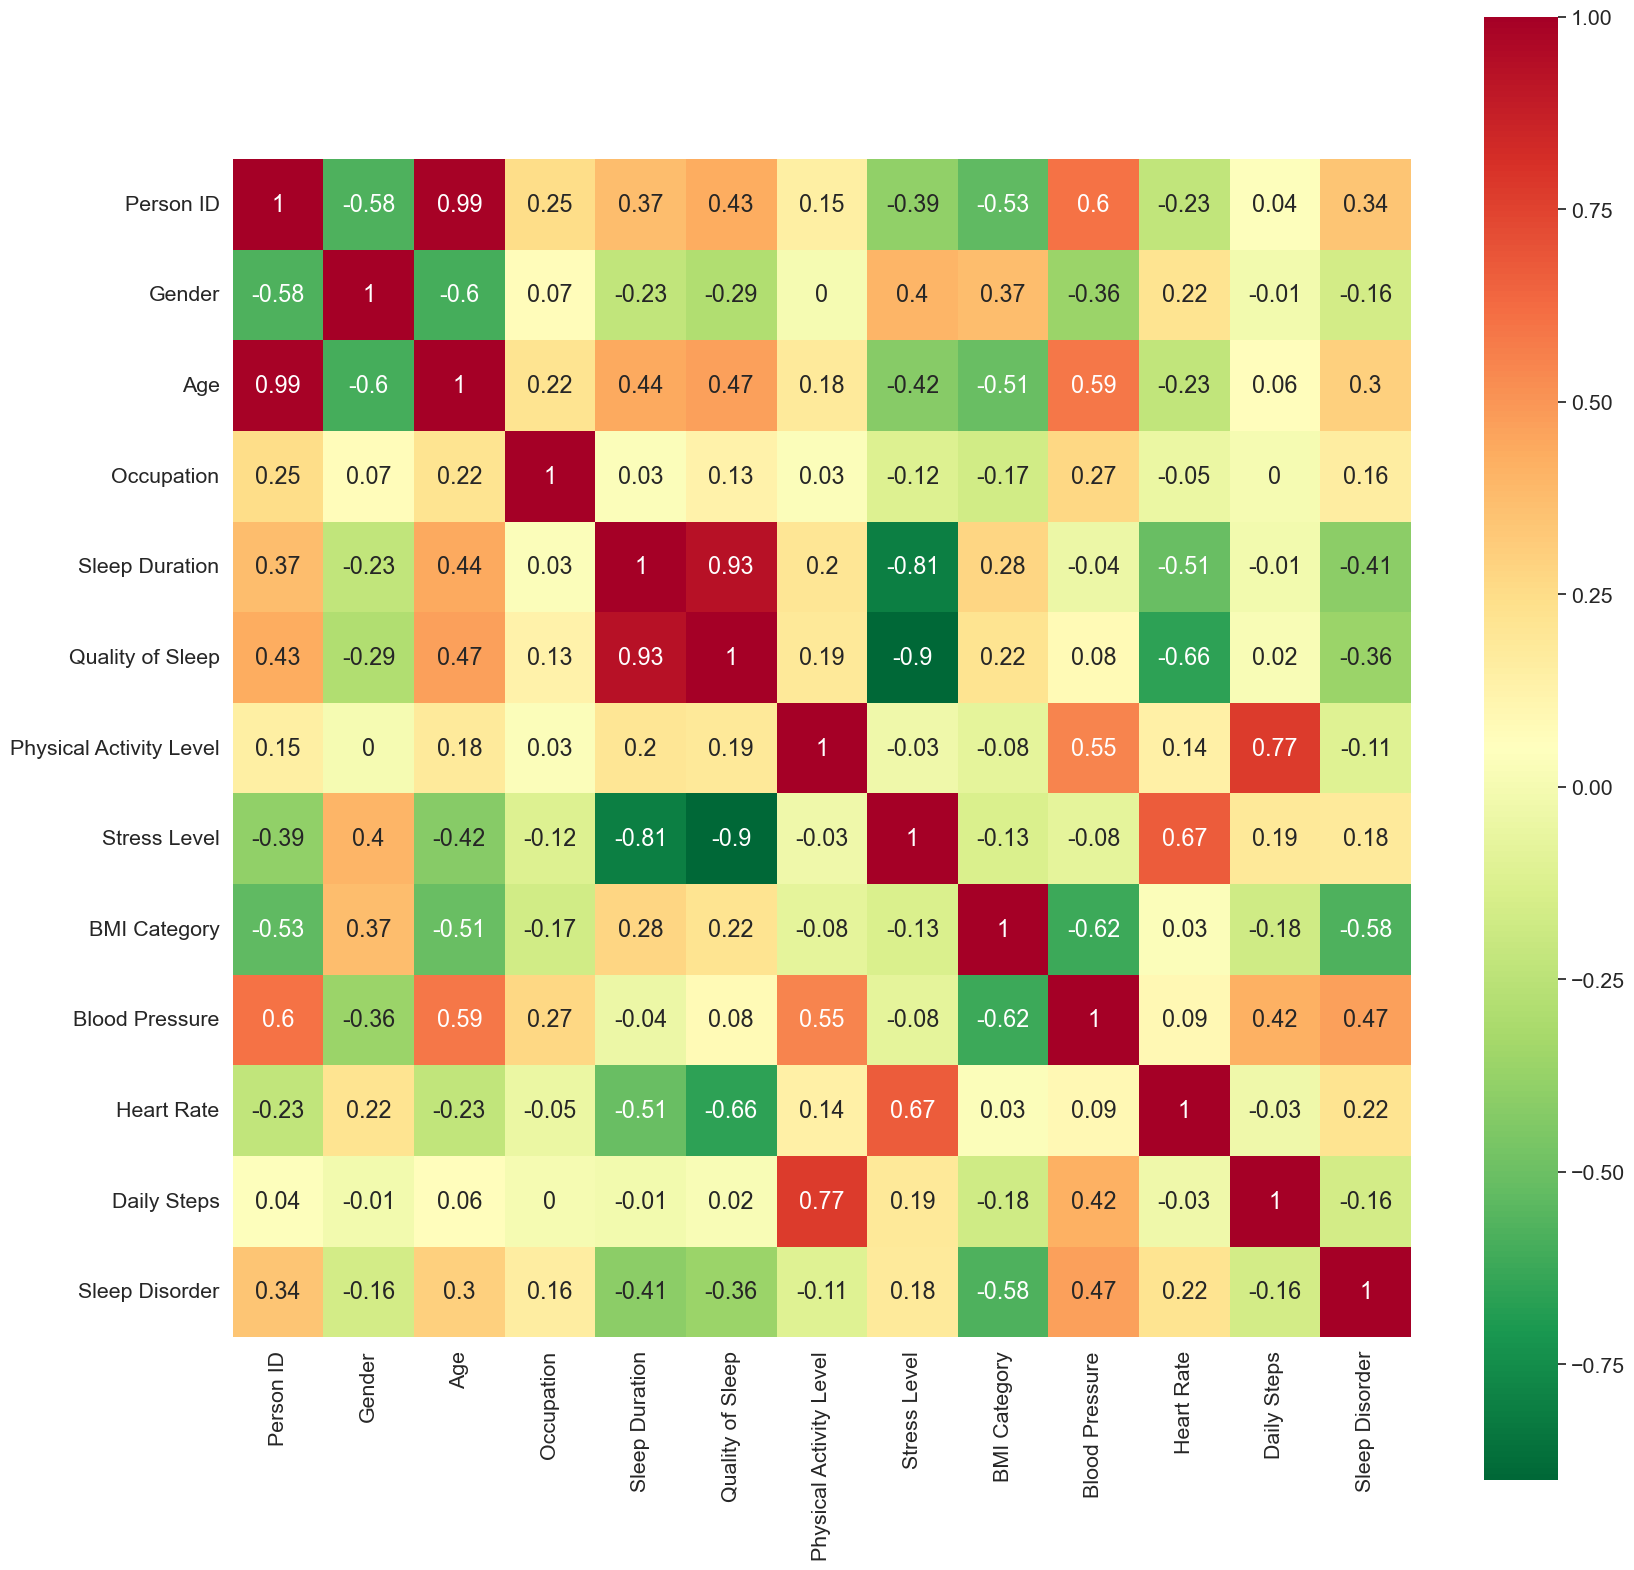

In [41]:
# Correlation Heatmap
correlation = dataset.corr()
plt.subplots(figsize = (19,19))
sns.heatmap(correlation.round(2),
            annot = True,
            vmax = 1,
            square = True,
            cmap = 'RdYlGn_r')
plt.show()

Temuan: Age, Sleep Duration dan Quality Of Sleep pilih jadi satu atribut

In [42]:
dataset.drop(['Sleep Duration'], axis="columns", inplace=True) #menghapus atribut Sleep Duration

In [43]:
dataset.info() #cek kembali dataset feature yg sudah di pilih

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Person ID                374 non-null    int64
 1   Gender                   374 non-null    int64
 2   Age                      374 non-null    int64
 3   Occupation               374 non-null    int32
 4   Quality of Sleep         374 non-null    int64
 5   Physical Activity Level  374 non-null    int64
 6   Stress Level             374 non-null    int64
 7   BMI Category             374 non-null    int32
 8   Blood Pressure           374 non-null    int64
 9   Heart Rate               374 non-null    int64
 10  Daily Steps              374 non-null    int64
 11  Sleep Disorder           374 non-null    int64
dtypes: int32(2), int64(10)
memory usage: 32.3 KB


Cek Boxplot

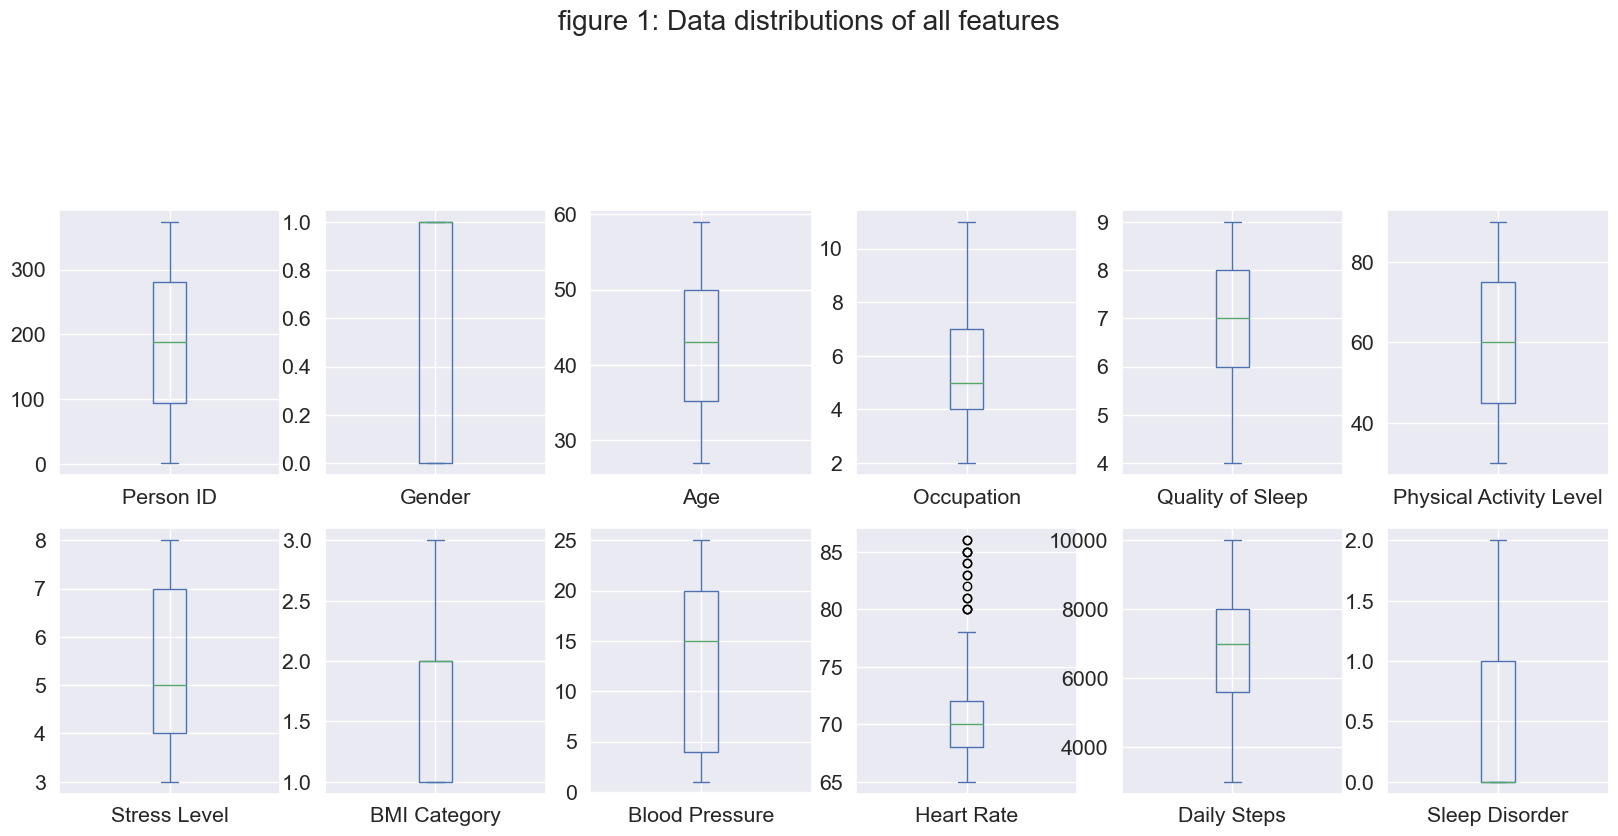

In [44]:
dataset.plot(kind='box',subplots=True,layout=(5,6), sharex=False,figsize = (20,20),
                           title='figure 1: Data distributions of all features')
plt.show()

# BAB 7 – menentukan label data

In [45]:
# Drop kolom CustomerID, Gender dan Age
dataset = dataset.drop(['Person ID', 'Gender', 'Age'], axis = 1)
dataset

,Occupation,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,5,6,42,6,1,1,77,4200,0
1,2,6,60,8,2,2,75,10000,0
2,2,6,60,8,2,2,75,10000,0
3,3,4,30,8,3,3,85,3000,1
4,3,4,30,8,3,3,85,3000,1
...,...,...,...,...,...,...,...,...,...
369,5,9,75,3,1,23,68,7000,1
370,5,9,75,3,1,23,68,7000,1
371,5,9,75,3,1,23,68,7000,1
372,5,9,75,3,1,23,68,7000,1


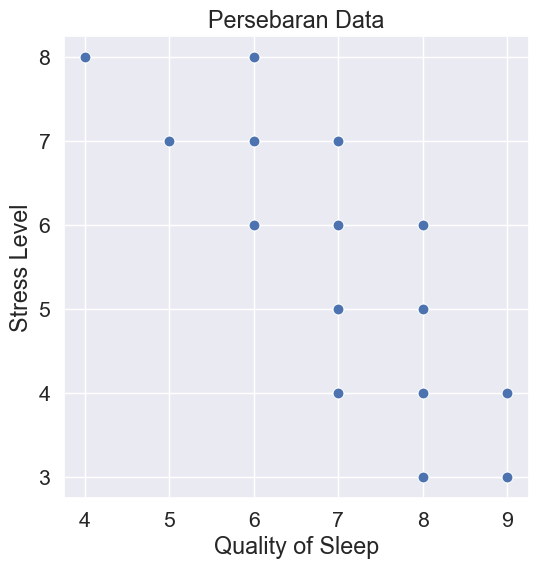

In [46]:
# Persebaran data
plt.figure(figsize=(6,6))
sns.scatterplot(x = 'Quality of Sleep', y = 'Stress Level', data = dataset, s = 60)
plt.title('Persebaran Data')
plt.show()

In [49]:
# Hitung Within Cluster Sum of Squared erorr (WCSS) untuk setiap kluster yang berbeda

from sklearn.cluster import KMeans

wcss = []
for i in range (1,11):
    kmModel = KMeans(n_clusters = i, n_init = 10)
    kmModel.fit(dataset)
    wcss.append(kmModel.inertia_)

<function matplotlib.pyplot.show(close=None, block=None)>

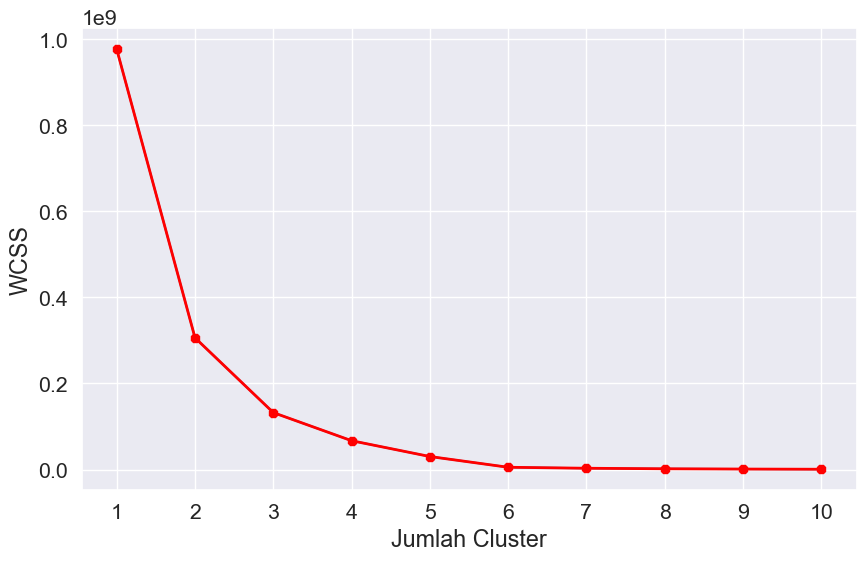

In [50]:
plt.figure(figsize = (10,6))
plt.plot(range(1,11), wcss)
plt.plot(range(1,11), wcss, linewidth = 2, color = 'red', marker = '8')
plt.xlabel("Jumlah Cluster")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show

# BAB 8 - MEMBANGUN MODEL KLASIFIKASI NAIVE BAYES

In [51]:
# Model dengan 3 cluster
kmModelFix = KMeans(n_clusters = 3, n_init =10) # n_init = 10/ n_init = 'auto'
kmModelFix.fit(dataset)

hasil_prediksi = kmModelFix.predict(dataset)

# Memprediksi hasil
hasil_prediksi = kmModelFix.predict(dataset)
hasil_prediksi

array([0, 2, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0,

In [52]:
dataset['Label'] = hasil_prediksi
dataset

,Occupation,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Label
0,5,6,42,6,1,1,77,4200,0,0
1,2,6,60,8,2,2,75,10000,0,2
2,2,6,60,8,2,2,75,10000,0,2
3,3,4,30,8,3,3,85,3000,1,0
4,3,4,30,8,3,3,85,3000,1,0
...,...,...,...,...,...,...,...,...,...,...
369,5,9,75,3,1,23,68,7000,1,1
370,5,9,75,3,1,23,68,7000,1,1
371,5,9,75,3,1,23,68,7000,1,1
372,5,9,75,3,1,23,68,7000,1,1


<function matplotlib.pyplot.show(close=None, block=None)>

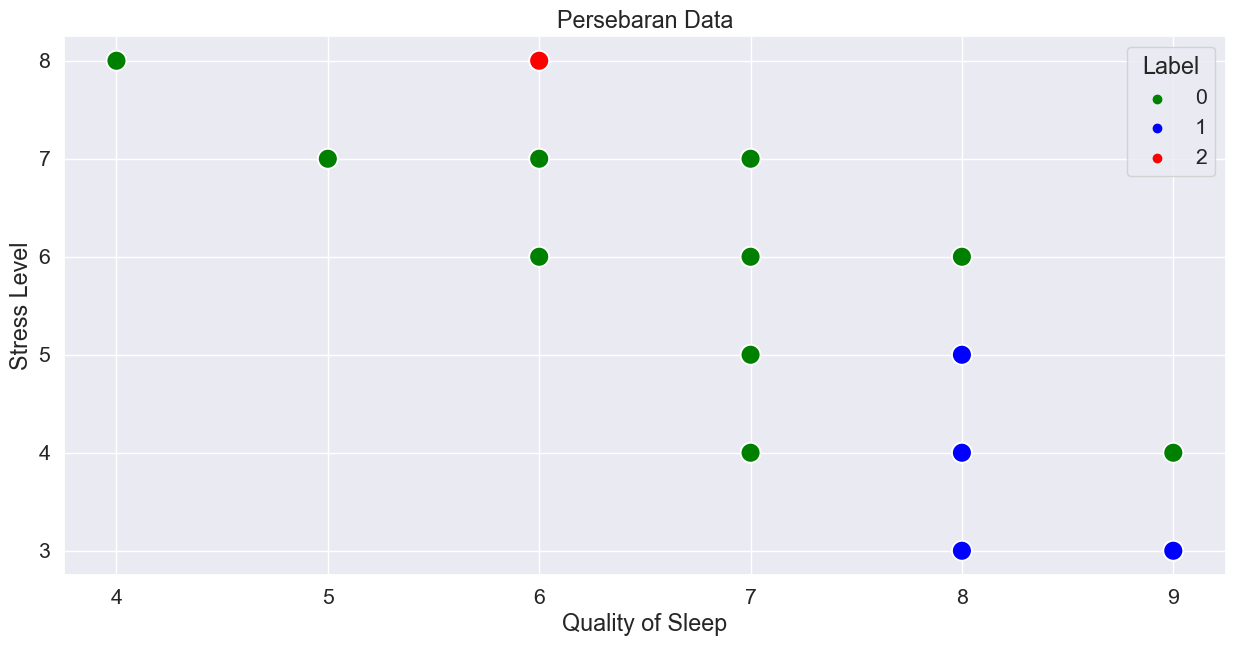

In [59]:
# Persebaran data berdasarkan labelnya

plt.figure(figsize = (15,7))
sns.scatterplot(x = 'Quality of Sleep', y = 'Stress Level', hue = 'Label',
palette = ['green', 'blue', 'red'], legend = 'full', data = dataset, s = 200)
plt.title('Persebaran Data')
plt.show

#### Cluster 0: Terdiri dari data dengan kualitas tidur rendah dan stres rendah.



#### Cluster 1: Terdiri dari data dengan kualitas tidur sedang dan stres sedang.

#### Cluster 2: Terdiri dari data dengan kualitas tidur tinggi dan stres tinggi.

Persebaran data terlihat sedikit dikarenakan variavel-variabel dari atribut yang digunakan bernilai genap dan bernilai sama